#EOSC 511
##Assignment 6, Lab6
###Tereza Jarníková
###Student number: 81586142


do Problems: **Experiment, Steady States, Adaptive** and **Sensitivity**



In [1]:
from numlabs.lab5.lab5_funs_copy import Integrator
from collections import namedtuple
import numpy as np


class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f

<a name="prob_experiment"></a>
**[Problem Experiment](#prob_experiment)** Lorenz’ results are based on the following values
of the physical parameters taken from Saltzman’s paper (Saltzman, 1962):
$$\sigma=10 \quad \mathrm{and} \quad b=\frac{8}{3}.$$ As you will see
in [Section stability](#sec_stability), there is a *critical value of the
parameter $\rho$*, $\rho^\ast=470/19\approx 24.74$ (for these values of
$\sigma$ and $\beta$); it is *critical* in the sense that for
any value of $\rho>\rho^\ast$, the flow is unstable.

To allow you to investigate the behaviour of the solution to the Lorenz
equations, you can try out various parameter values in the following
interactive example. *Initially, leave $\sigma$ and $\beta$ alone, and
modify only $\rho$ and the initial conditions.* If you have time,
you can try varying the other two parameters, and see what happens. Here
are some suggestions:

-   Fix the initial conditions at $(5,5,5)$ and vary $\rho$ between $0$ and
    $100$.

-   Fix $\rho=28$, and vary the initial conditions; for example, try
    $(0,0,0)$, $(0.1,0.1,0.1)$, $(0,0,20)$, $(100,100,100)$,
    $(8.5,8.5,27)$, etc.

-   Anything else you can think of …

1.Describe the different types of behaviour you see and compare them
    to what you saw in [Figure fixed-plot](#fig_fixed-plot). Also, discuss the
    results in terms of what you read in [Section Introduction](#sec_introduction)
    regarding the four properties of the solution.

2.One question you should be sure to ask yourself is: *Does
    changing the initial condition affect where the solution ends
    up?* The answer to this question will indicate whether there
    really is an attractor which solutions approach as
    $t\rightarrow\infty$.

3.Finally, for the different types of solution behaviour, can you
    interpret the results physically in terms of the thermal convection
    problem?
    
    
**Solution** I did this in several steps - first I just plotted randomly chosen changes in rho and the starting point to get a feel for how the equations behave (see plot below), then, after reading the stability section of the problem, I picked a different set of sigma and beta, then plotted the behaviour of the solution at and near the stationary point(s). Below I'll show the stability chart and discuss the results. 

/Users/alena/Sync/numeric/numlabs/lab5/lab5_funs_copy.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  dtchange = a.s * (1.0 / errtest)**0.2


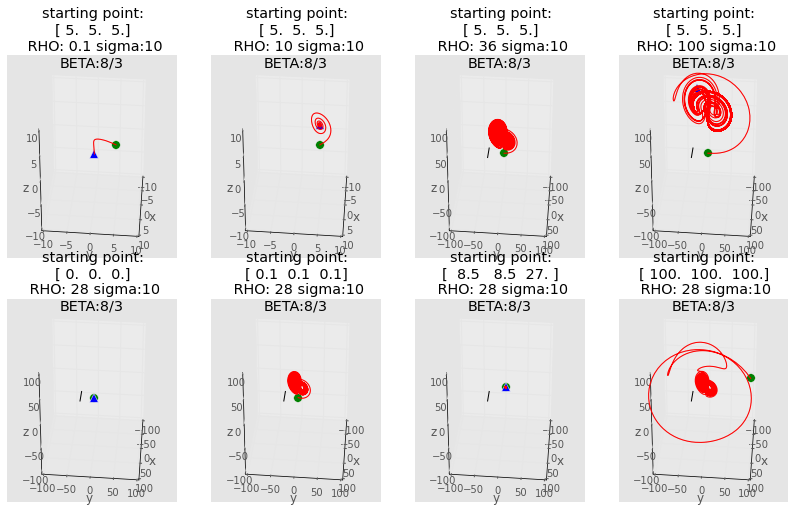

In [67]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

def plot_3d(ax,xvals,vals,zvals):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-30, 30))
    ax.set_ylim((-30, 30))
    ax.set_zlim((-30, 30))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

fig = plt.figure(figsize=(14,8))
file_list = ['lorenz2.yaml','lorenz3.yaml','lorenz4.yaml','lorenz9.yaml','lorenz5.yaml','lorenz6.yaml','lorenz7.yaml','lorenz8.yaml','lorenz9.yaml','lorenz10.yaml']
rho_list = ['0.1','10','36','100','28','28','28','28']
sigma_list = ['10','10','10','10','10','10','10','10']
beta_list = ['8/3','8/3','8/3','8/3','8/3','8/3','8/3','8/3']

for i in range(1,9):
    theSolver = Integ61(file_list[i-1])
    timevals, coords, errorlist, g ,w= theSolver.timeloop5Err()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]

# top figure
    ax = fig.add_subplot(2,4,i, projection='3d')
    ax=plot_3d(ax,xvals,yvals,zvals)
    ax.set_xlim([-100,100])
    ax.set_ylim([-100,100])
    ax.set_zlim([-100,100])
    
    if (i <3):
        ax.set_xlim([-10,10])
        ax.set_ylim([-10,10])
        ax.set_zlim([-10,10])
    out=ax.set(title='starting point: \n' + str(coords[0,:]) + '\n RHO: ' + rho_list[i-1] + ' sigma:' + sigma_list[i-1]+ '\nBETA:' + beta_list[i-1])
    
plt.show()

1.) To summarize the behaviour, I made a chart: Below see my stability chart and the corresponding plots. Indeed, we see the expected behaviour, as discussed in the stability bit of the lab:
-only one stationary point when rho< 1

-3 stationary points (unstable origin and 2 other stable stationary points) when 1<rho<rho✭ 

-3 S.Ps, and instability everywhere when rho > rho✭ 

2. When the points are unstable (say, rho>rho✭), where a solution starts very much affects where it ends up - if you start on the stationary point, you stay there, but if you start very near it you don't end up there. When you have stable points, they act as stable attractors. 

3. WRT the movement of hot water in a container, these equations demostrate that how the water behaves is dependent mostly on Prandtl number (ratio of viscous diffusion to thermal diffusion) and Beta (width to height of convection layer). I don't know much about fluid dynamics, but it seems that higher Prandtl numbers will yield higher rho✭ (above rho✭ there is unstable chaotic behaviour everywhere). Water has Prandtl numbers of ~(2-15), while glycerin has ~(20,000-100,000). If the rho is above rho✭, there isn't a steady state of x(convective movement),y(temperature difference),z(distortion from linearity in gradient) that the be reached, unless we start out at one of the SPs, in which case we stay there. If it's below one, we have a stable attractor at the origin (nothing moves, no temperature difference, linear by default) and nowhere else, if it's between one and rho✭, we have 2 attracting steady states that we may or may not reach, depending where we start, but we will not end at the origin unless we start out there. 

<img src=files/IMG_1438.JPG>

/Users/alena/Sync/numeric/numlabs/lab5/lab5_funs_copy.py:174: RuntimeWarning: divide by zero encountered in double_scalars
  dtchange = a.s * (1.0 / errtest)**0.2


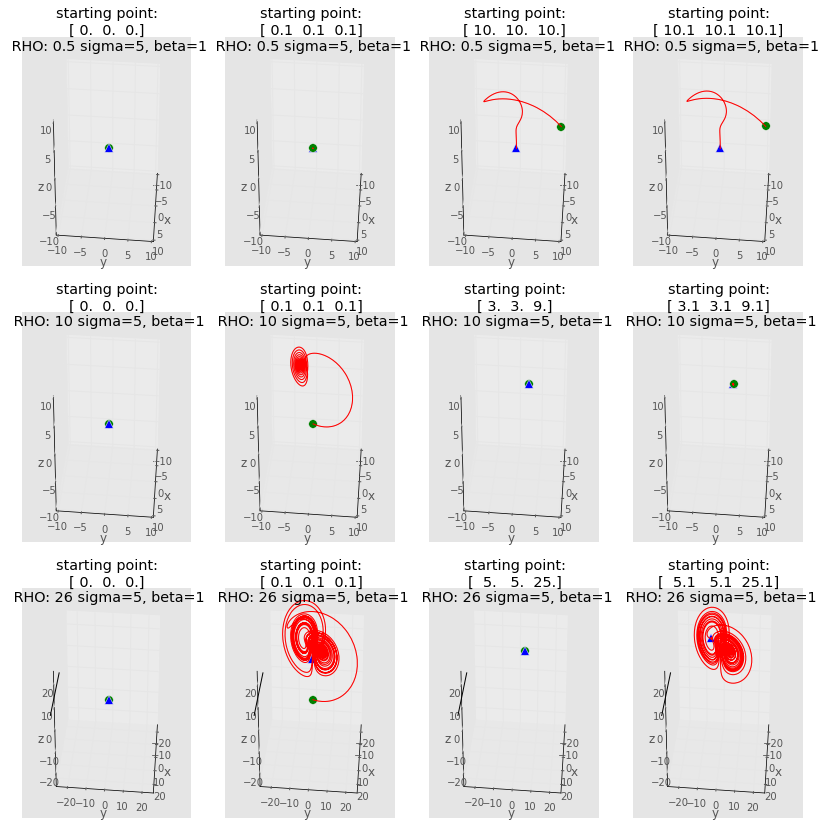

In [3]:
fig = plt.figure(figsize=(14,14))
file_list = ['lor_tj1.yaml','lor_tj2.yaml','lor_tj3.yaml','lor_tj4.yaml','lor_tj5.yaml','lor_tj6.yaml','lor_tj7.yaml','lor_tj8.yaml','lor_tj9.yaml','lor_tj10.yaml','lor_tj11.yaml','lor_tj12.yaml']
rho_list = ['0.5','0.5','0.5','0.5','10','10','10','10','26','26','26','26']

for i in range(1,13):
    theSolver = Integ61(file_list[i-1])
    timevals, coords, errorlist, g ,w= theSolver.timeloop5Err()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
# top figure
    ax = fig.add_subplot(3,4,i, projection='3d')
    ax=plot_3d(ax,xvals,yvals,zvals)
    ax.set_xlim([-10,10])
    ax.set_ylim([-10,10])
    ax.set_zlim([-10,10])
    
    if (i >8):
        ax.set_xlim([-25,25])
        ax.set_ylim([-25,25])
        ax.set_zlim([-25,25])
    out=ax.set(title='starting point: \n' + str(coords[0,:]) + '\n RHO: ' + rho_list[i-1] + ' sigma=5, beta=1')
    
plt.show()

**[Problem steady-states](#prob_steady-states)** Set the time derivatives equal to zero in the
Lorenz equations ([eq:lorenz](#eq_lorenz)), and solve the
resulting system to show that there are three possible steady states,
namely the points

-   $(0,0,0)$,

-   $(\sqrt{\beta(\rho-1)},\sqrt{\beta(\rho -1)},\rho -1)$, and

-   $(-\sqrt{\beta (\rho -1)},-\sqrt{\beta(\rho-1)},\rho-1)$.

Remember that $\rho$ is a positive real number, so that that there is
*only one* stationary point when $0\leq \rho \leq 1$, but all
three stationary points are present when $\rho >1$.

While working through [Problem experiment](#prob_experiment), did you notice the
change in behaviour of the solution as $\rho$ passes through the value 1?
If not, then go back to the interactive example and try out some values
of $\rho$ both less than and greater than 1 to see how the solution
changes.

I solved the system on paper below & did find the steady state points :

<img src=files/IMG_1421.JPG>

I also did notice the change in the behaviour of the solution as rho passes through 1 - the origin becomes unstable (and 2 other stationary points appear). I demonstrate the change in stability of the origin below, and the rest is discussed in Problem experiment.

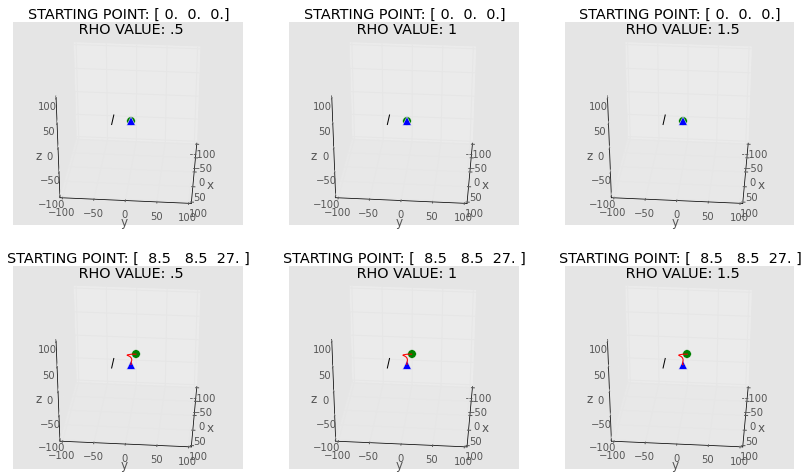

In [4]:
fig = plt.figure(figsize=(14,8))
file_list = ['lorenz11.yaml','lorenz12.yaml','lorenz13.yaml','lorenz14.yaml','lorenz15.yaml','lorenz16.yaml']
rho_val = ['.5','1','1.5','.5','1','1.5']
for i in range(1,7):
    theSolver = Integ61(file_list[i-1])
    timevals, coords, errorlist = theSolver.timeloop5fixed()

    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
# top figure
    ax = fig.add_subplot(2,3,i, projection='3d')
    ax=plot_3d(ax,xvals,yvals,zvals)
    ax.set_xlim([-100,100])
    ax.set_ylim([-100,100])
    ax.set_zlim([-100,100])
    out=ax.set(title='STARTING POINT: ' + str(coords[0,:]) + '\n RHO VALUE: ' + rho_val[i-1])
    
    
plt.show()

<a name="prob_adaptive"></a>
**Problem Adaptive:**  You saw in that adaptive time-stepping saved a
considerable amount of computing time for the Daisy World problem. In
this problem, you will be investigating whether or not an adaptive
Runge-Kutta code is the best choice for the Lorenz equations.

Use the Integrator61 object to compute in both adaptive and
fixed timeloop solutions for an extended integration. 
Compare the number of time steps taken (plot the
time step vs. the integration time for both methods). Which method is
more efficient?  Which is fastest?  A simple way to time a portion of
a script is to use the ```time``` module to calculate the elapsed time:

```
import time
tic = time.time()
#program here
elapsed = time.time() - tic
```

To answer this last question, you will have to consider the cost of the
adaptive scheme, compared to the non-adaptive one. The adaptive scheme
is obviously more expensive, but by how much? You should think in terms
of the number of multiplicative operations that are required in every
time step for each method. You don’t have to give an exact operation
count, round figures will do.

Finally, we mentioned that the code that produced the animation uses
a C module called odeint.   It is called [here](https://github.com/phaustin/numeric/blob/lab6/lab6/lorenz_ode.py#L22-L23) using derivatives defined in 
[lorenz_deriv](https://github.com/phaustin/numeric/blob/lab6/lab6/lorenz_ode.py#L11-L14).
Use odeint to solve the same problem you did for the fixed and adaptive
timeloops.  What is the speed increase you see by using the compiled module?

**Problem Adaptive answer** The adaptive timeloop differs from the fixed one in that it evaluates error obtained in each calculation, compares with error tolerance, and adjusts step size accordingly. I integrated using both timeloops for 5 different timestep sizes. The results are plotted below, both in terms of steps taken and time taken. For the fixed loop, both steps and time taken decrease in a relationship of 1/(size of timestep), while the adaptive loop takes more or less the same time every time, because it quickly adjusts its timestep to yield an error within the error acceptance. For this problem's given error tolerance and step size (1e-8 and .02), the fixed time loop is faster. 

I also modified the adaptive code to give me number of times it entered the 'testing/modifying stepsize' loop in the code. This is shown in the 3rd plot, and doesn't seem to depend on initial stepsize. 

I also created a special case, where I adjusted the timesteps so that the number of timesteps taken by both loops was the same. I printed out how long the calculation took and how many times the adaptive loop went into the 'modifying stepsize' loop. You can see below that the adaptive loop always takes longer, because it goes into the 'modifying stepsize' calculations. 

Scipy module vs  other methods (fixed or adaptive): I used the same timing method to time how long the module took to compute 2500 steps, then timed how long the fixed timeloop takes to compute that number of steps. In this case, the scipy module is almost a hundred times faster.

In [113]:
w = 50/.02
print(w)

2500.0


In [116]:
from lorenz_ode import lorentz_deriv
import time
from scipy import integrate
N_trajectories = 1
x0 = -15 + 30 * np.random.random((N_trajectories, 3))
t = np.linspace(0, 4, 2500)
tic = time.time()
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])
elapsed = time.time()-tic
print('HOW LONG DOES THE MODULE TAKE TO INTEGRATE?')
print(elapsed)

tic
theSolver = Integ61('lorenz.yaml')
timevals, coords, errorlist = theSolver.timeloop5fixed()
elapsed = time.time() - tic
print('HOW LONG DID THE FIXED TIMELOOP TAKE?')
print(elapsed)
print('HOW MANY STEPS DID IT TAKE?')
print(len(timevals))

HOW LONG DOES THE MODULE TAKE TO INTEGRATE?
0.014490842819213867
HOW LONG DID THE FIXED TIMELOOP TAKE?
0.9365799427032471
HOW MANY STEPS DID IT TAKE?
2500


In [110]:
import numlabs.lab5.lab5_funs_copy
import importlib
importlib.reload(numlabs.lab5.lab5_funs_copy)
from numlabs.lab5.lab5_funs_copy import Integrator
import time



file_list = ['lor_time1.yaml','lor_time2.yaml','lor_time3.yaml','lor_time4.yaml','lor_time5.yaml']
dt_list = ['.005','.04','.08','.5','1']
dt_ar = [.005,.04,.08,.5,1]
time_taken_fixed = [0,0,0,0,0]
time_taken_adapt = [0,0,0,0,0]
steps_taken_fixed = [0,0,0,0,0]
steps_taken_adapt = [0,0,0,0,0]
in_fail_loop = [0,0,0,0,0]

for i in range(1,6):
    tic = time.time()
    theSolver = Integ61(file_list[i-1])
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    elapsed = time.time() - tic
    time_taken_fixed[i-1] = elapsed
    steps_taken_fixed[i-1] = len(timevals)
    
    tic = time.time()
    timevals, coords, errorlist, g  , w=theSolver.timeloop5Err()
    elapsed = time.time() - tic
    time_taken_adapt[i-1] = elapsed    
    in_fail_loop[i-1] = g
    steps_taken_adapt[i-1] = len(timevals)

timevssteps_fixed = [0,0,0,0,0]  
timevssteps_adapt = [0,0,0,0,0] 
for i in range(0,5):
    timevssteps_fixed[i]=time_taken_fixed[i]/steps_taken_fixed[i]
    timevssteps_adapt[i]=time_taken_adapt[i]/steps_taken_adapt[i]
    
tic
theSolver = Integ61('lorenz17.yaml')
timevals, coords, errorlist = theSolver.timeloop5fixed()
elapsed = time.time() - tic
print('HOW LONG DID THE FIXED TIMELOOP TAKE?')
print(elapsed)
print('HOW MANY STEPS DID IT TAKE?')
print(len(timevals))

tic
theSolver = Integ61('lorenz17.yaml')
timevals, coords, errorlist,g,w = theSolver.timeloop5Err()
elapsed = time.time() - tic
print('HOW LONG DID THE ADAPTIVE TIMELOOP TAKE?')
print(elapsed)
print('HOW MANY TIMES DID IT ENTER THE *FAIL LOOP*?')
print(g)
print('HOW MANY STEPS DID IT TAKE?')
print(len(timevals))


/Users/alena/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:44: RuntimeWarning: overflow encountered in double_scalars
/Users/alena/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:45: RuntimeWarning: overflow encountered in double_scalars
/Users/alena/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:44: RuntimeWarning: invalid value encountered in double_scalars
/Users/alena/Sync/numeric/numlabs/lab5/lab5_funs_copy.py:101: RuntimeWarning: invalid value encountered in multiply
  estError = estError + c2[i] * derivArray[i, :]
/Users/alena/Sync/numeric/numlabs/lab5/lab5_funs_copy.py:106: RuntimeWarning: invalid value encountered in multiply
  ynext = ynext + c1[i] * derivArray[i, :]
/Users/alena/Sync/numeric/numlabs/lab5/lab5_funs_copy.py:93: RuntimeWarning: invalid value encountered in add
  bsum = bsum + b[i, j] * derivArray[j, :]
/Users/alena/Sync/numeric/numlabs/lab5/lab5_funs_copy.py:96: RuntimeWarning: invalid value encountered in add


HOW LONG DID THE FIXED TIMELOOP TAKE?
4.820016860961914
HOW MANY STEPS DID IT TAKE?
4795
HOW LONG DID THE ADAPTIVE TIMELOOP TAKE?
7.803865909576416
HOW MANY TIMES DID IT ENTER THE *FAIL LOOP*?
517
HOW MANY STEPS DID IT TAKE?
4794


/Users/alena/anaconda/lib/python3.4/site-packages/matplotlib/legend.py:319: UserWarning: Unrecognized location "top right". Falling back on "best"; valid locations are
	best
	lower left
	center left
	lower right
	upper center
	center right
	right
	lower center
	upper left
	center
	upper right

  % (loc, '\n\t'.join(six.iterkeys(self.codes))))


ValueError: num must be 0 <= num <= 3, not 4

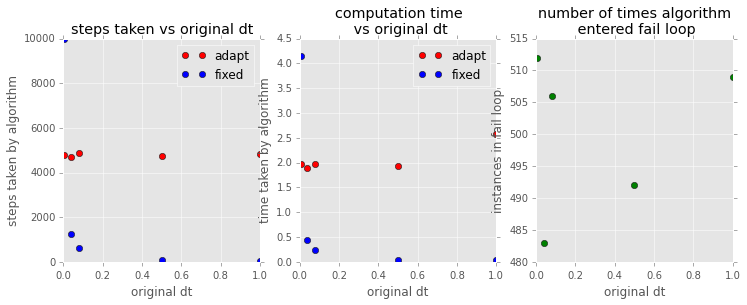

In [115]:
fig, big_axes = plt.subplots( figsize=(12.0, 4.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False
    
for i in range(1,4):
        
    ax = fig.add_subplot(1,3,i)
    if i ==1:
        ax.plot(dt_ar, steps_taken_adapt,'ro',label= 'adapt') 
        ax.plot(dt_ar, steps_taken_fixed, 'bo',label = 'fixed')
        ax.legend(loc='top right')
        ax.set_xlabel('original dt')
        ax.set_ylabel('steps taken by algorithm')
        ax.set_title('steps taken vs original dt')
        
    if i ==2:
        ax.plot(dt_ar, time_taken_adapt,'ro',label= 'adapt') 
        ax.plot(dt_ar, time_taken_fixed, 'bo',label = 'fixed')
        ax.legend(loc='top right')
        ax.set_xlabel('original dt')
        ax.set_ylabel('time taken by algorithm')
        ax.set_title('computation time \n vs original dt')
    if i ==3:
        theLines = ax.plot(dt_ar, in_fail_loop,'go') 
        ax.set_xlabel('original dt')
        ax.set_ylabel('instances in fail loop')
        ax.set_title('number of times algorithm \n entered fail loop')
    if i ==4:
        ax.plot(dt_ar, timevssteps_adapt,'ro',label= 'adapt') 
        ax.plot(dt_ar, timevssteps_fixed, 'bo',label = 'fixed')
        ax.legend(loc='top right')
        ax.set_xlabel('original dt')
        ax.set_ylabel('time taken per step')
        ax.set_title('time taken per step')
    
fig.set_facecolor('w')
plt.show()


<a name="prob_sensitivity"></a>
**Problem Sensitivity**: One property of chaotic systems such as the
Lorenz equations is their *sensitivity to initial
conditions* – a consequence of the “butterfly effect.” Modify
your code from [Problem adaptive](#prob_adaptive) to compute two trajectories
(in the chaotic regime $r>r^\ast$) with different initial conditions
*simultaneously*. Use two initial conditions that are very
close to each other, say $(1,1,20)$ and $(1,1,20.001)$. Use your “method
of choice” (adaptive/non-adaptive), and plot the distance between the
two trajectories as a function of time. What do you see?

I rebuilt an Integ62 that has an extra set of initvars, called (imaginatively) initvars2, and then plotted both solutions for a "chaotic everywhere" set of sigma , beta, and rho, as well as the 3-d distance between them. I did this for two sets of initial conditions - (I) one where one of the starting points is on a stationary point and one is near it but  not on it, and (II) one where both are far from a stationary point. 

(I). One of the points doesn't move, and the other runs around it chaotically inside the attractor, so the distance between them is bounded by the maximum distance that the attractor's domain is from the stationary point. 

(II). The points stay on the same trajectory (distance between them is almost negligible) until they get into the domain of the attractor, at which point they behave chaotically, but the distance between them is bounded by the maximum distance on the attractor (the 2 points in the domain of the attractor that are furthest apart). 


In [6]:
from numlabs.lab5.lab5_funs_copy import Integrator
from collections import namedtuple
import numpy as np



class Integ62(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,initvars2=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,initvars2,uservars,timevars)
        
    def set_yinit(self,initvars,initvars2,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        if initvars2:
            self.config['initvars2'].update(initvars)
        initvars2 = namedtuple('initvars2', self.config['initvars2'].keys())
        self.initvars2 = initvars(**self.config['initvars2'])        
        
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.yinit2 = np.array(
            [self.initvars2.x, self.initvars2.y, self.initvars2.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f
    


In [11]:
def plot_3d_2var(ax,xvals,vals,zvals,xvals2,vals2,zvals2):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-30, 30))
    ax.set_ylim((-30, 30))
    ax.set_zlim((-30, 30))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    line2,=ax.plot(xvals2,yvals2,zvals2,'k-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    line2.set(alpha=0.2)
    return ax

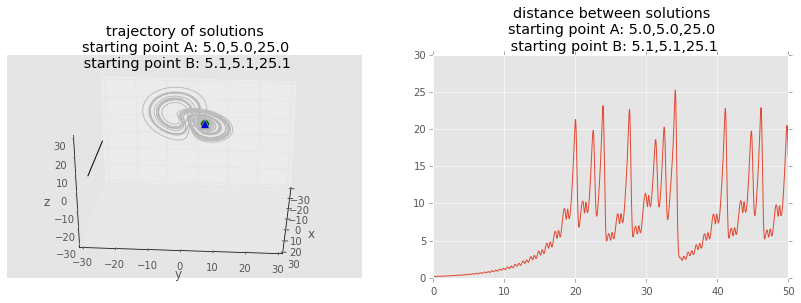

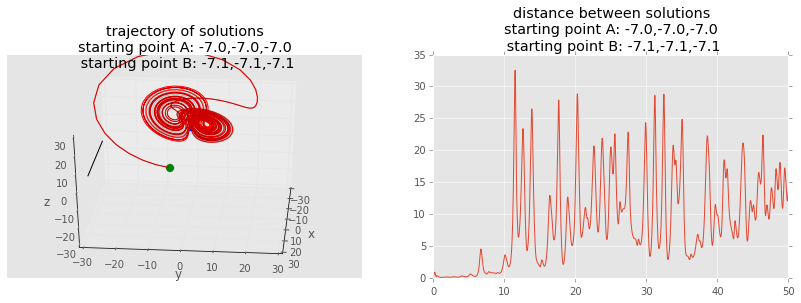

In [30]:
import numlabs.lab5.lab5_fun_simult
import importlib
importlib.reload(numlabs.lab5.lab5_funs_copy)

fig = plt.figure(figsize=(14,4))
for i in range(1,3):
    theSolver = Integ62('lor_sens.yaml')
    timevals, coords, errorlist, coords2, errorlist2 = theSolver.timeloop5fixed_for2()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
    xvals2,yvals2,zvals2=coords2[:,0],coords2[:,1],coords2[:,2]
    #finding distance in 3d space
    xdif = (xvals - xvals2)**2
    ydif = (yvals - yvals2)**2
    zdif = (zvals - zvals2)**2
    dist = (np.sqrt(xdif+ydif+zdif))
# top figure
    if i==1:
        ax = fig.add_subplot(1,2,i, projection='3d')
        ax=plot_3d_2var(ax,xvals,yvals,zvals,xvals2,yvals2,zvals2)
        out=ax.set(title='trajectory of solutions\nstarting point A: {},{},{}'.format(*coords[0,:]) + '\n starting point B: {},{},{}'.format(*coords2[0,:])  )
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.plot(timevals,dist)

        out=ax.set(title='distance between solutions\nstarting point A: {},{},{}'.format(*coords[0,:]) + '\n starting point B: {},{},{}'.format(*coords2[0,:]))

fig = plt.figure(figsize=(14,4))
for i in range(1,3):
    theSolver = Integ62('lor_sens2.yaml')
    timevals, coords, errorlist, coords2, errorlist2 = theSolver.timeloop5fixed_for2()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
    xvals2,yvals2,zvals2=coords2[:,0],coords2[:,1],coords2[:,2]
    #finding distance in 3d space
    xdif = (xvals - xvals2)**2
    ydif = (yvals - yvals2)**2
    zdif = (zvals - zvals2)**2
    dist = (np.sqrt(xdif+ydif+zdif))
# top figure
    if i==1:
        ax = fig.add_subplot(1,2,i, projection='3d')
        ax=plot_3d_2var(ax,xvals,yvals,zvals,xvals2,yvals2,zvals2)
        out=ax.set(title='trajectory of solutions\nstarting point A: {},{},{}'.format(*coords[0,:]) + '\n starting point B: {},{},{}'.format(*coords2[0,:]) )
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.plot(timevals,dist)

        out=ax.set(title='distance between solutions\nstarting point A: {},{},{}'.format(*coords[0,:]) + '\n starting point B: {},{},{}'.format(*coords2[0,:]))



